# APS 4

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [9]:
df = pd.read_csv('data_blocos/dados.csv')
df.drop(['Series Code', 'Series Name', 'Country Code'], axis=1, inplace=True)
df.set_index('Country Name', inplace=True)
df = df.T
df.head(10)

Country Name,World,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe,NaN,NaN,NaN,NaN,NaN
1990 [YR1990],..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,NaN,NaN,NaN,NaN,NaN
2000 [YR2000],..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,NaN,NaN,NaN,NaN,NaN
2011 [YR2011],..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,NaN,NaN,NaN,NaN,NaN
2012 [YR2012],..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,NaN,NaN,NaN,NaN,NaN
2013 [YR2013],..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,NaN,NaN,NaN,NaN,NaN
2014 [YR2014],..,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,NaN,NaN,NaN,NaN,NaN
2015 [YR2015],23,45.1,38.8,22.9,..,..,66.5,..,19.2,..,...,..,..,..,48.8,64.7,NaN,NaN,NaN,NaN,NaN
2016 [YR2016],23.8,49.6,39,21.5,..,..,..,..,25.9,..,...,..,..,..,49.4,66.7,NaN,NaN,NaN,NaN,NaN
2017 [YR2017],24.8,54.3,38.6,19.7,..,..,..,..,32.3,17.1,...,..,26.3,..,50.1,67,NaN,NaN,NaN,NaN,NaN
2018 [YR2018],25.8,57.5,37.1,17.6,..,..,70.1,..,35.8,14.8,...,..,26.3,..,50.8,66.7,NaN,NaN,NaN,NaN,NaN


In [10]:
uniao_europeia = ['Germany', 'Austria', 'Belgium', 'Bulgaria', 'Czech Republic', 'Cyprus', 'Croatia', 'Denmark', 'Slovak Republic', 'Slovenia', 'Spain', 'Estonia', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden']

total = len(uniao_europeia)
avancado = 0

media_mundial = float(df.loc['2019 [YR2019]']["World"])

avancados_uniao_europeia = []

for pais in uniao_europeia:
    if df.loc['2019 [YR2019]'][pais] != '..':
        if float(df.loc['2019 [YR2019]'][pais]) <= media_mundial:
            avancado += 1
            avancados_uniao_europeia.append(pais)

p_avancado_uniao_europeia = (avancado/total)

print(f'A probabilidade de um país da União Europeia ser avançado é: {p_avancado_uniao_europeia*100:.2f}%')

A probabilidade de um país da União Europeia ser avançado é: 96.30%


In [11]:
# ex3
BRICS = ['Brazil', 'Russian Federation', 'India', 'China', 'South Africa']

total = len(BRICS)
avancado = 0
avancados_BRICS = []

for pais in BRICS:
    if df.loc['2019 [YR2019]'][pais] != '..':
        if float(df.loc['2019 [YR2019]'][pais]) <= media_mundial:
            avancado +=1
            avancados_BRICS.append(pais)

p_avancado_brics = (avancado/total)
print(f'A probabilidade de um país dos BRICS ser avançado é: {p_avancado_brics*100:.2f}%')

A probabilidade de um país dos BRICS ser avançado é: 40.00%


Mudanças na APS anterior:

- sistema de classificação

In [12]:
print(avancados_uniao_europeia)
print(avancados_BRICS)

['Germany', 'Austria', 'Belgium', 'Bulgaria', 'Czech Republic', 'Croatia', 'Denmark', 'Slovak Republic', 'Slovenia', 'Spain', 'Estonia', 'Finland', 'France', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Sweden']
['Brazil', 'Russian Federation']


In [24]:
def bootstrap(grupo,avancados,n):
    percent = []
    for i in range(n):
        a = []
        amostras = np.random.choice(grupo, size=len(grupo), replace=True)
        for p in amostras:
            if p in avancados:
                a.append(p)
        percent.append(len(a)/len(grupo))
    return np.mean(percent),np.percentile(percent, 5), np.percentile(percent, 95)

In [25]:
print(bootstrap(uniao_europeia,avancados_uniao_europeia,100000))
print(bootstrap(BRICS,avancados_BRICS,100000))

bt_media_união_europeia, bt_5_uniao_europeia, bt_95_uniao_europeia = bootstrap(uniao_europeia,avancados_uniao_europeia,100000)
bt_media_BRICS, bt_5_BRICS, bt_95_BRICS = bootstrap(BRICS,avancados_BRICS,100000)

(0.9630240740740742, 0.8888888888888888, 1.0)
(0.4011020000000001, 0.0, 0.8)


Text(0.5, 1.0, 'Insegurança Alimentar: comparação de nível entre a União Europeia e BRICS')

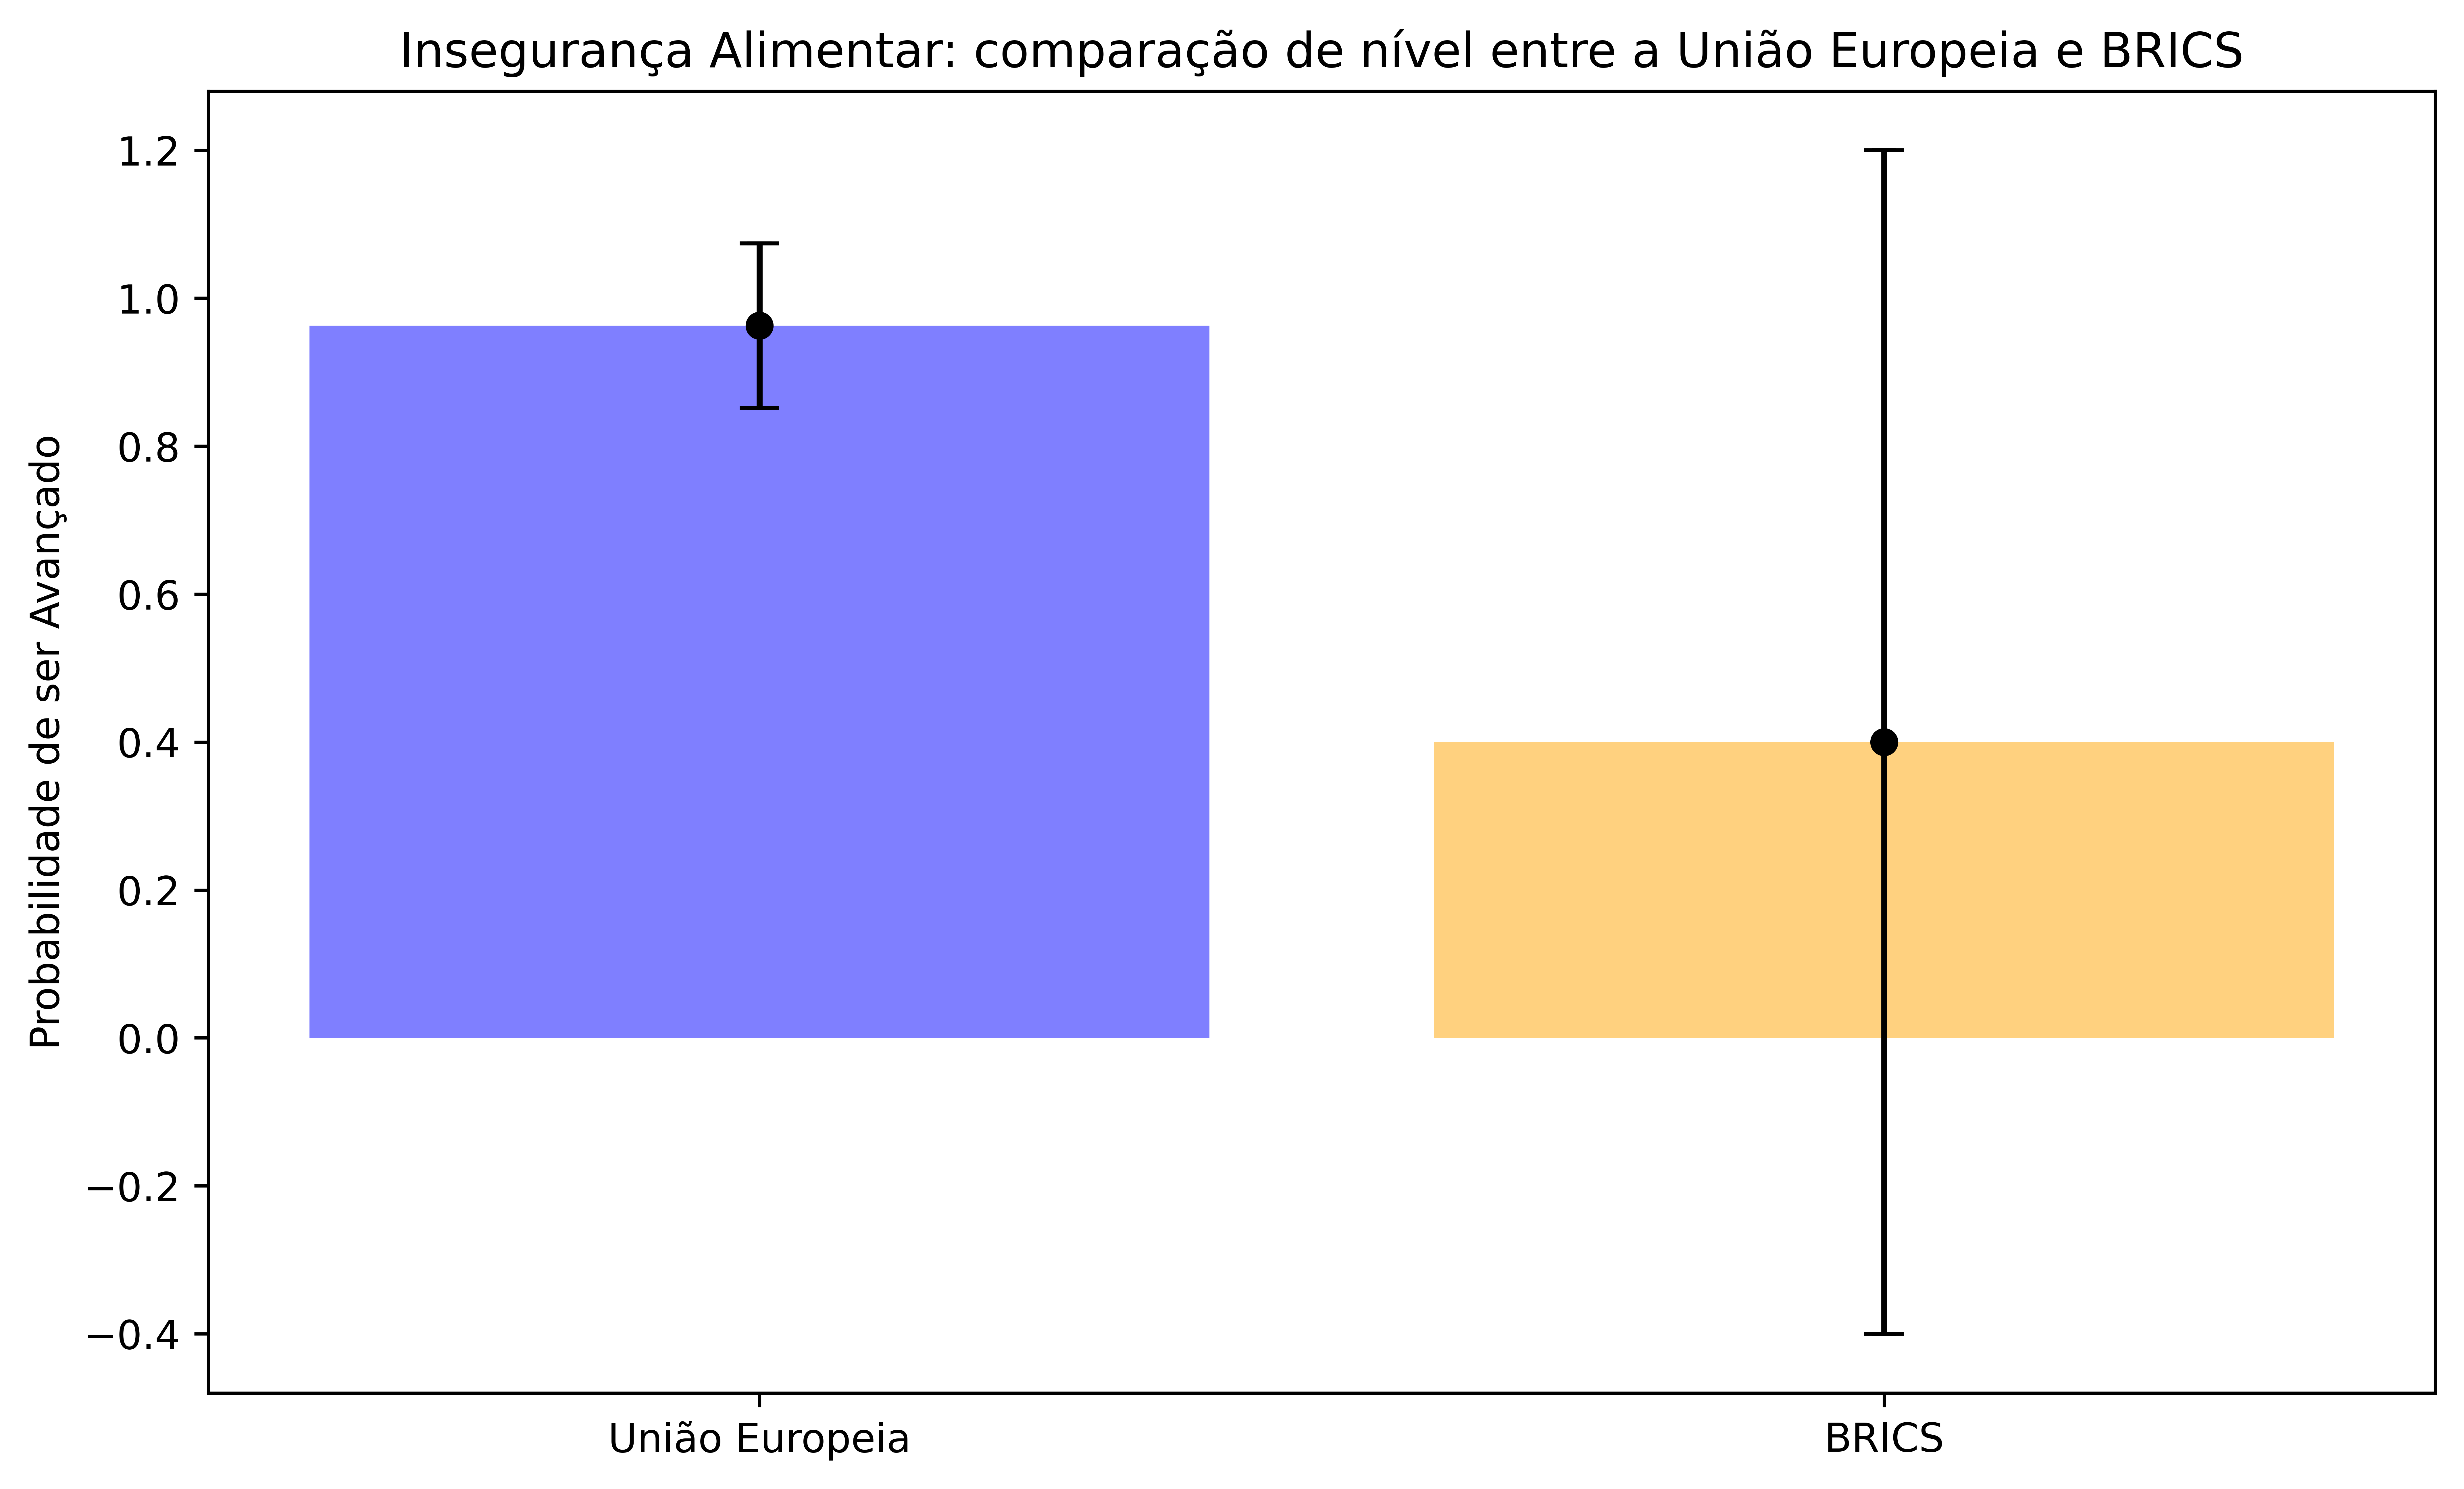

In [31]:
#grafico   
plt.figure(figsize=(10, 6),dpi=1000)
plt.bar(['União Europeia', 'BRICS'], [p_avancado_uniao_europeia, p_avancado_brics], yerr=[bt_95_uniao_europeia-bt_5_uniao_europeia,bt_95_BRICS-bt_5_BRICS],capsize=5,color=['blue','orange'],alpha=0.5)
plt.errorbar(0, p_avancado_uniao_europeia, yerr=bt_95_uniao_europeia-bt_5_uniao_europeia, fmt='o', color='black', ecolor='black', elinewidth=1, capsize=3)
plt.errorbar(1, p_avancado_brics, yerr=bt_95_BRICS-bt_5_BRICS, fmt='o', color='black', ecolor='black', elinewidth=1, capsize=3)
plt.ylabel('Probabilidade de ser Avançado')
plt.title('Insegurança Alimentar: comparação de nível entre a União Europeia e BRICS') 